<a href="https://colab.research.google.com/github/truonghuynh210962/PROJECT/blob/master/Meetup3_1_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd

In [11]:
os.getcwd()

'/content'

In [10]:
!ls '/content'

 sample_data  'US Demography.csv'


In [0]:
dataset = pd.read_csv('US Demography.csv')

In [24]:
dataset['work_class'].value_counts()

Private             698
Self-emp-not-inc     81
Local-gov            68
?                    62
State-gov            37
Self-emp-inc         33
Federal-gov          21
Name: work_class, dtype: int64

In [0]:
dataset = dataset[dataset['work_class']!='?']

In [40]:
dataset.pivot_table(values = ['capital_gain','capital_loss'] , index = 'work_class',aggfunc='sum')

,capital_gain,capital_loss
work_class,,
Federal-gov,29108,1408
Local-gov,6827,1340
Private,395873,72312
Self-emp-inc,57773,1977
Self-emp-not-inc,30367,12274
State-gov,28259,0


In [58]:
pd.crosstab( index = dataset['work_class'] , columns = dataset['education'], values = dataset['capital_gain'],aggfunc= 'sum').transpose()

work_class,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
education,,,,,,
10th,NaN,0.0,0.0,NaN,0.0,NaN
11th,NaN,0.0,8953.0,NaN,9386.0,0.0
12th,NaN,0.0,0.0,NaN,0.0,NaN
1st-4th,NaN,NaN,0.0,NaN,NaN,NaN
5th-6th,NaN,NaN,0.0,0.0,NaN,NaN
7th-8th,NaN,0.0,0.0,0.0,NaN,NaN
9th,0.0,0.0,1055.0,NaN,0.0,NaN
Assoc-acdm,0.0,0.0,8614.0,NaN,0.0,0.0
Assoc-voc,0.0,0.0,13858.0,NaN,NaN,0.0


In [51]:
dataset.columns

Index(['age', 'work_class', 'education', 'education_num', 'marital_status',
       'occupation', 'ethnicity', 'gender', 'capital_gain', 'capital_loss',
       'hour_per_week', 'native_country', 'income_level'],
      dtype='object')

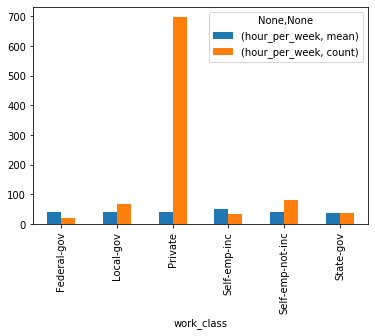

In [91]:
dataset.groupby('work_class').agg({'hour_per_week':['mean','count']}).plot(kind = 'bar',)

In [95]:
dataset.apply(lambda x: x==0).sum()

age                 0
work_class          0
education           0
education_num       0
marital_status      0
occupation          0
ethnicity           0
gender              0
capital_gain      862
capital_loss      890
hour_per_week       0
native_country      0
income_level        0
dtype: int64

In [99]:
dataset['capital_gain'].value_counts().sort_values().tail()

4386       5
7298       8
7688       8
15024     11
0        862
Name: capital_gain, dtype: int64

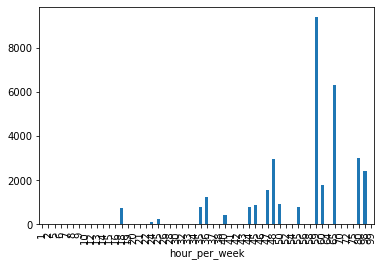

In [114]:
dataset.groupby('hour_per_week').agg('mean').capital_gain.sort_index().plot(kind =  'bar')

In [111]:
dataset['hour_per_week'].describe()['max']/7

14.142857142857142

In [115]:
dataset['native_country'].value_counts()

United-States         846
Mexico                 20
?                      16
Portugal                4
Puerto-Rico             4
Cuba                    4
Philippines             4
Poland                  3
India                   3
Germany                 3
Iran                    3
England                 3
Canada                  2
Haiti                   2
El-Salvador             2
Honduras                2
Taiwan                  2
Jamaica                 2
Guatemala               2
Dominican-Republic      2
Laos                    1
Italy                   1
South                   1
France                  1
Thailand                1
Columbia                1
China                   1
Cambodia                1
Ecuador                 1
Name: native_country, dtype: int64